In [21]:
from pathlib import Path
import os

In [22]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
tqdm.pandas()

In [6]:
train_dir = 'opt/ml/input/data/train'

In [7]:
df = pd.read_csv(f"{train_dir}/train.csv")

In [8]:
df.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [124]:
df['gender'].value_counts()

female    1658
male      1042
Name: gender, dtype: int64

In [127]:
n_female, n_male = df['gender'].value_counts()
total = n_female + n_male
print(f"female: {n_female/total*100:.3}% \tmale: {n_male/total*100:.3}%")
# plt.bar(0, n_male/total, width=0.5, alpha=0.8)
# plt.bar(0, n_female/total, width=0.5, bottom=n_male/total, alpha=0.8)
# plt.yticks([1, 0.5], ['female', 'male'])

female: 61.4% 	male: 38.6%


In [63]:
df['race'].unique()

array(['Asian'], dtype=object)

In [66]:
df['age'].describe()

count    2700.000000
mean       37.708148
std        16.985904
min        18.000000
25%        20.000000
50%        36.000000
75%        55.000000
max        60.000000
Name: age, dtype: float64

In [13]:
age_cls1 = df.loc[df['age'] < 30]
age_cls2 = df.loc[(df['age'] >= 30) & (df['age'] < 60)]
age_cls3 = df.loc[df['age'] >= 60]
female_df = df.loc[df['gender'] == 'female']
male_df = df.loc[df['gender'] == 'male']

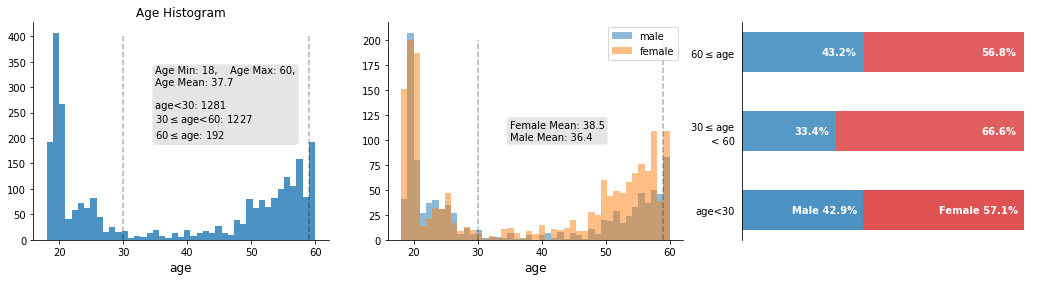

In [96]:
df = pd.read_csv(f"{train_dir}/train.csv")

age_cls1 = df.loc[df['age'] < 30]
age_cls2 = df.loc[(df['age'] >= 30) & (df['age'] < 60)]
age_cls3 = df.loc[df['age'] >= 60]
female_df = df.loc[df['gender'] == 'female']
male_df = df.loc[df['gender'] == 'male']

fig, ax = plt.subplots(1, 3, figsize=(18, 4))
ax[0].hist(df['age'], alpha=0.8, bins=43)
ax[0].vlines([30, 59], 0, 400, linestyles='dashed', alpha=0.3)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlabel('age', size=12)
ax[0].set_title('Age Histogram')
ax[0].text(35, 200, f"Age Min: {df['age'].min()},    Age Max: {df['age'].max()},\nAge Mean: {df['age'].mean():.1f}\n\nage<30: {age_cls1['age'].shape[0]}\n30$\leq$age<60: {age_cls2['age'].shape[0]}\n60$\leq$age: {age_cls3['age'].shape[0]}",
        bbox=dict(boxstyle='round', fc="gray", ec='w', alpha=0.2))

ax[1].hist(male_df['age'], alpha=0.5, bins=43, range=(18,60), label='male')
ax[1].hist(female_df['age'], alpha=0.5, bins=43, range=(18,60), label='female')
ax[1].vlines([30, 59], 0, 200, linestyles='dashed', alpha=0.3)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].text(35, 100, f"Female Mean: {female_df['age'].mean():.1f}\nMale Mean: {male_df['age'].mean():.1f}",
bbox=dict(boxstyle='round', fc="gray", ec='w', alpha=0.2))
ax[1].set_xlabel('age', size=12)
ax[1].legend()

age_cls1_male = age_cls1['age'].loc[age_cls1['gender'] == 'male'].shape[0]/age_cls1.shape[0]
age_cls1_female = age_cls1['age'].loc[age_cls1['gender'] == 'female'].shape[0]/age_cls1.shape[0]
age_cls2_male = age_cls2['age'].loc[age_cls2['gender'] == 'male'].shape[0]/age_cls2.shape[0]
age_cls2_female = age_cls2['age'].loc[age_cls2['gender'] == 'female'].shape[0]/age_cls2.shape[0]
age_cls3_male = age_cls3['age'].loc[age_cls3['gender'] == 'male'].shape[0]/age_cls3.shape[0]
age_cls3_female = age_cls3['age'].loc[age_cls3['gender'] == 'female'].shape[0]/age_cls3.shape[0]

ax[2].barh(1, age_cls1_male, alpha=0.8, height=0.5, color='tab:blue')
ax[2].barh(1, age_cls1_female, alpha=0.8, left=age_cls1_male, height=0.5, color='tab:red')
ax[2].text(age_cls1_male-0.25, 1, f"Male {age_cls1_male*100:.1f}%", color='w', fontweight='bold', verticalalignment='center')
ax[2].text(0.7, 1, f"Female {age_cls1_female*100:.1f}%", color='w', fontweight='bold', verticalalignment='center')

ax[2].barh(2, age_cls2_male, alpha=0.75, height=0.5, color='tab:blue')
ax[2].barh(2, age_cls2_female, alpha=0.75, left=age_cls2_male, height=0.5, color='tab:red')
ax[2].text(age_cls2_male-0.15, 2, f"{age_cls2_male*100:.1f}%", color='w', fontweight='bold', verticalalignment='center')
ax[2].text(0.85, 2, f"{age_cls2_female*100:.1f}%", color='w', fontweight='bold', verticalalignment='center')

ax[2].barh(3, age_cls3_male, alpha=0.75, height=0.5, color='tab:blue', label='male')
ax[2].barh(3, age_cls3_female, alpha=0.75, left=age_cls3_male, height=0.5, color='tab:red', label='female')
ax[2].text(age_cls3_male-0.15, 3, f"{age_cls3_male*100:.1f}%", color='w', fontweight='bold', verticalalignment='center')
ax[2].text(0.85, 3, f"{age_cls3_female*100:.1f}%", color='w', fontweight='bold', verticalalignment='center')

ax[2].set_yticks([1, 2, 3])
ax[2].set_yticklabels(["age<30", "30$\leq$age\n< 60", "60$\leq$age"])

ax[2].spines['top'].set_visible(False)
ax[2].spines['bottom'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].tick_params(bottom=False, labelbottom=False, left=False)

# ax[2].legend()

In [36]:
def img_checker(img_path):
    _cnt = 0
    img_name_list = []
    img_format_list = []
    for img_name in Path(f"{TRAIN_IMAGE_PATH}/{img_path}").iterdir():
        img_stem = img_name.stem
        if not img_stem.startswith('._'):
            img_format_list.append(img_name.suffix)
            img_name_list.append(img_stem)
            _cnt += 1
    return _cnt, img_format_list, img_name_list

In [155]:
img_cnt = []
img_name = []
img_format = []
for img_path in df['path']:
    _result = img_checker(img_path)
    img_cnt.append(_result[0])
    img_name.append(_result[2])
    img_format.append(_result[1])
img_cnt = pd.DataFrame(img_cnt)
img_name = pd.DataFrame(img_name)
img_format = pd.DataFrame(img_format)


In [156]:
img_cnt[0].unique()

array([7])

In [158]:
img_format.value_counts()

0      1      2      3      4      5      6    
.jpg   .jpg   .jpg   .jpg   .jpg   .jpg   .jpg     2574
.png   .png   .png   .png   .png   .png   .png       73
.jpeg  .jpeg  .jpeg  .jpeg  .jpeg  .jpeg  .jpeg      46
                            .jpg   .jpeg  .jpeg       5
.jpg   .jpg   .jpg   .jpg   .jpg   .jpeg  .jpg        2
dtype: int64

In [159]:
img_format['path'] = df['path'] # for loop를 통해 결과를 얻었기 때문에 순서가 유지.
img_format.loc[(img_format[4]=='.jpg') & (img_format[5]=='.jpeg')]

,0,1,2,3,4,5,6,path
2557,.jpeg,.jpeg,.jpeg,.jpeg,.jpg,.jpeg,.jpeg,006578_male_Asian_19
2559,.jpeg,.jpeg,.jpeg,.jpeg,.jpg,.jpeg,.jpeg,006580_female_Asian_20
2560,.jpeg,.jpeg,.jpeg,.jpeg,.jpg,.jpeg,.jpeg,006582_female_Asian_20
2561,.jpeg,.jpeg,.jpeg,.jpeg,.jpg,.jpeg,.jpeg,006584_female_Asian_20
2562,.jpeg,.jpeg,.jpeg,.jpeg,.jpg,.jpeg,.jpeg,006589_female_Asian_20
2584,.jpg,.jpg,.jpg,.jpg,.jpg,.jpeg,.jpg,006626_male_Asian_19
2593,.jpg,.jpg,.jpg,.jpg,.jpg,.jpeg,.jpg,006643_male_Asian_19


In [164]:
img_name.drop_duplicates()

,0,1,2,3,4,5,6
0,mask4,normal,mask3,mask1,incorrect_mask,mask5,mask2
2256,normal,mask4,mask1,incorrect_mask,mask5,mask3,mask2
2517,mask2,normal,incorrect_mask,mask1,mask5,mask4,mask3


## Prepare fixed & labeled train.csv

In [111]:
import pandas as pd
from pathlib import Path
from tqdm import tqdm

# MAIN_PATH = '/opt/ml/p_stage_img_cls'
# TRAIN_DATA_PATH = 'data/mask_data/train'
TRAIN_IMAGE_PATH = f"{train_dir}/images"

df = pd.read_csv(f"{train_dir}/train.csv")

new_data_list = []
for idx in tqdm(range(len(df))):  # tqdm 을 이용하면 현재 데이터가 얼마나 처리되고 있는지 파악되어 좋습니다.
    _path = df['path'].iloc[idx]  # 순서대로 가져와야 하기 때문에 iloc을 사용해 가져옵니다.
    _gender = df['gender'].iloc[idx]
    _age = df['age'].iloc[idx]
    _id = df['id'].iloc[idx]

    for img_name in Path(f"{TRAIN_IMAGE_PATH}/{_path}").iterdir():  # 각 dir의 이미지들을 iterative 하게 가져옵니다.
        img_stem = img_name.stem  # 해당 파일의 파일명만을 가져옵니다. 확장자 제외.
        if not img_stem.startswith('._'):  # avoid hidden files
            new_data_list.append([_id, _path, _age, _gender, img_stem, img_name.__str__()])  # [중요!] id는 중복 문제가 있습니다. https://stages.ai/competitions/74/discussion/post/390

df = pd.DataFrame(new_data_list)
df.columns = ['id', 'path', 'age', 'gender', 'stem', 'img_path']

100%|██████████| 2700/2700 [00:00<00:00, 8364.27it/s]


In [112]:
df.head()

,id,path,age,gender,stem,img_path
0,000001,000001_female_Asian_45,45,female,mask4,/opt/ml/p_stage_img_cls/data/mask_data/train/i...
1,000001,000001_female_Asian_45,45,female,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...
2,000001,000001_female_Asian_45,45,female,mask3,/opt/ml/p_stage_img_cls/data/mask_data/train/i...
3,000001,000001_female_Asian_45,45,female,mask1,/opt/ml/p_stage_img_cls/data/mask_data/train/i...
4,000001,000001_female_Asian_45,45,female,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...


In [113]:
# https://stages.ai/competitions/74/discussion/post/439 오재환_T2134 캠퍼님
# https://stages.ai/competitions/74/discussion/post/434 서동진_T2108 캠퍼님

gender_labeling_error = ['006359', '006360', '006361', '006362', '006363', '006364']
mask_labeling_error = ['000020', '004418', '005227']

df['gender_issue'] = df['id'].isin(gender_labeling_error)  # gender 의 경우 dir 내의 이미지가 모두 동일 인물이다.
df['mask_issue'] = df['id'].isin(mask_labeling_error) & df['stem'].isin(['normal', 'incorrect_mask'])
# df.loc[(df['gender_issue'] == True) | (df['mask_issue'] == True)]

In [114]:
def fix_issued_label(_df):
    _df.loc[_df['mask_issue'] == True, 'stem'] = _df.loc[_df['mask_issue'] == True, 'stem'].map({'normal': 'incorrect_mask', 'incorrect_mask': 'normal'})
    _df.loc[_df['mask_issue'] == True, 'mask_issue'] = False
    _df.loc[_df['gender_issue'] == True, 'gender'] = _df.loc[_df['gender_issue'] == True, 'gender'].map({'female': 'male', 'male': 'female'})
    _df.loc[_df['gender_issue'] == True, 'gender_issue'] = False
    return _df

print("### Fix Before ####################################")
wrong_mask_index = df.loc[df['mask_issue'] == True].index
df.loc[wrong_mask_index]

### Fix Before ####################################


,id,path,age,gender,stem,img_path,gender_issue,mask_issue
106,000020,000020_female_Asian_50,50,female,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,True
109,000020,000020_female_Asian_50,50,female,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,True
13294,004418,004418_male_Asian_20,20,male,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,True
13297,004418,004418_male_Asian_20,20,male,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,True
14477,005227,005227_male_Asian_22,22,male,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,True
14480,005227,005227_male_Asian_22,22,male,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,True


In [118]:
df = fix_issued_label(df)
print("### Fix After #####################################")
df.loc[wrong_mask_index]

### Fix After #####################################


,id,path,age,gender,stem,img_path,gender_issue,mask_issue,label
106,000020,000020_female_Asian_50,50,female,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,10
109,000020,000020_female_Asian_50,50,female,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,16
13294,004418,004418_male_Asian_20,20,male,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,6
13297,004418,004418_male_Asian_20,20,male,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,12
14477,005227,005227_male_Asian_22,22,male,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,6
14480,005227,005227_male_Asian_22,22,male,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,12


In [116]:
# https://stages.ai/competitions/74/discussion/post/428 전경재_T2190 캠퍼님의 접근법을 이용.

df['label'] = 0  # SET SCORE

# AGE
# df['label'] += (df['age'] < 30)*0  # Zero sum
df['label'] += ((df['age'] >= 30) & (df['age'] < 60))*1
df['label'] += (df['age'] >= 60)*2

# GENDER
# df['label'] += (df['gender'] == 'male')*0  # Zero sum
df['label'] += (df['gender'] == 'female')*3

# MASK wearing condition
# df['label'] += (df['stem'].isin(['mask1', 'mask2', 'mask3', 'mask4', 'mask5']))*0  # Zero sum
df['label'] += (df['stem'].isin(['incorrect_mask']))*6
df['label'] += (df['stem'].isin(['normal']))*12


In [117]:
df.head()

,id,path,age,gender,stem,img_path,gender_issue,mask_issue,label
0,000001,000001_female_Asian_45,45,female,mask4,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,4
1,000001,000001_female_Asian_45,45,female,normal,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,16
2,000001,000001_female_Asian_45,45,female,mask3,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,4
3,000001,000001_female_Asian_45,45,female,mask1,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,4
4,000001,000001_female_Asian_45,45,female,incorrect_mask,/opt/ml/p_stage_img_cls/data/mask_data/train/i...,False,False,10


In [120]:
df.gender_issue.sum(), df.mask_issue.sum()

(0, 0)

In [ ]:
df = df[['id','path','age','gender']]

In [121]:
df.to_csv(f"{MAIN_PATH}/{TRAIN_DATA_PATH}/train_labeled.csv", index=False)

In [95]:
df.loc[df['mask_issue'] == True]
# df.loc[df['gender_issue'] == True]

,id,path,age,gender,stem,img_path,gender_issue,mask_issue


In [14]:

df.loc[df['gender_issue'] == True]['path'].unique()

array(['006359_female_Asian_18', '006360_female_Asian_18',
       '006361_female_Asian_18', '006362_female_Asian_18',
       '006363_female_Asian_18', '006364_female_Asian_18'], dtype=object)

In [15]:
df.loc[df['mask_issue'] == True]['path'].unique()

array(['000020_female_Asian_50', '004418_male_Asian_20',
       '005227_male_Asian_22'], dtype=object)

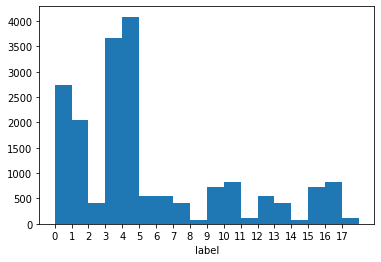

In [44]:
list_ = [i for i in range(18)]
fig, ax = plt.subplots(1,1)
df['label'].hist(ax=ax, bins=18, range=(0, 18))
ax.set_xticks(list_)
ax.set_xlabel('label')
ax.grid(False)